In [1]:
import scipy.sparse
import scipy.linalg
import numpy as np
import mkprop
import matplotlib.pyplot as plt
nrm = lambda x : np.linalg.norm(x,2)

n = 3000
e = np.ones(n)
rande = 1j*np.random.rand(n-1)
e1 = np.ones(n-1) + rande
# M is scaled finite difference discretization of 1d Laplace operator
#M = scipy.sparse.diags([e1,-2*e,e1], [-1,0,1]) # eigenvalues in [0,4]
M = scipy.sparse.diags([e1.conjugate()/2,np.zeros(n),e1/2], [-1,0,1]) # eigenvalues in [-1,1]
#M = scipy.sparse.diags([np.linspace(-1,1,n)], [0]) # eigenvalues in [-1,1]

#ex = np.random.rand(n-1)
#M = scipy.sparse.diags([e1-1j*0.01*ex,-2*e,e1+1j*0.01*ex], [-1,0,1])
u=np.random.rand(n)+1j*np.random.rand(n)
#u=np.random.rand(n)
#u=np.ones(n)
u=u/nrm(u)
#J,_ = np.linalg.eig(M.toarray())

inr = lambda x,y : np.vdot(x,y)
nrm = lambda x : np.linalg.norm(x)
dt = 50
tol = 1e-6
yref = scipy.sparse.linalg.expm_multiply(1j*dt*M,u)

### Tests for Rayleigh approximation with Shift-and-Invert Krylov

In [2]:
nt=40
dtref = 50
dt0 = 5
dts = np.geomspace(dt0,dtref,nt)

msai = 30
shi = -2j
u=u/nrm(u)

mv = lambda x : M.dot(x)
#MSIinv = np.linalg.inv(M.toarray() - shi*np.eye(n))
#mvSI = lambda x : MSIinv.dot(x)
MSI = (M-shi*scipy.sparse.eye(n)).tocsc()
mvSI = lambda x : scipy.sparse.linalg.spsolve(MSI,x)

YKry,info = mkprop.expimv_SaIKry(mv,mvSI,shi,u,t=dts,m=msai,fixedts=[dtref],optinfo=2,shortr=True)
success, errests1, errests2, tlist, deflist,ocheck = info
errs = np.zeros(nt)
for j in range(nt):
    dtnow = dts[j]
    yref = scipy.sparse.linalg.expm_multiply(1j*dtnow*M,u)
    y1 = YKry[:,j]
    errs[j] = nrm(yref-y1)


C:\Users\tobias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mkprop\KrylovpropSAI.py:236: IntegrationWarning: The maximum number of subdivisions (30) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  defint, definterr = scipy.integrate.quad(evaladef, 0, dt,limit=30)


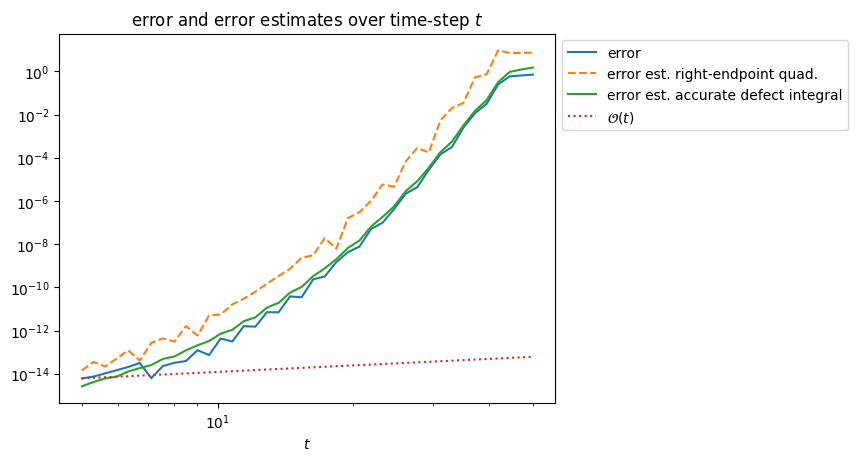

In [3]:
plt.loglog(dts,errs,dts,errests1,'--',dts,errests2,dts,(errs[0]*dts/dts[0])**1,':');
plt.gca().legend(('error', 'error est. right-endpoint quad.', 'error est. accurate defect integral', '$\mathcal{O}(t)$'),
                  bbox_to_anchor=(1.0, 1.0))
plt.xlabel('$t$')
plt.title('error and error estimates over time-step $t$');

In [4]:
dtref = 40
mmax = 32
YKry1, info1 = mkprop.expimv_SaIKry(mv,mvSI,shi,u,t=dtref,m=mmax,testallm=True,optinfo=2,shortr=True,reo=0)
success, errests11, errests12, tlist, deflist, ocheck1 = info1

C:\Users\tobias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mkprop\KrylovpropSAI.py:236: IntegrationWarning: The maximum number of subdivisions (30) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  defint, definterr = scipy.integrate.quad(evaladef, 0, dt,limit=30)


In [5]:
YKry2, info2 = mkprop.expimv_SaIKry(mv,mvSI,shi,u,t=dtref,m=mmax,testallm=True,optinfo=2,shortr=True,reo=1)
success, errests21, errests22, tlist, deflist, ocheck2 = info2
#print(info[0])
YKry3, info3 = mkprop.expimv_SaIKry(mv,mvSI,shi,u,t=dtref,m=mmax,testallm=True,optinfo=2,shortr=False,reo=0)
success, errests31, errests32, tlist, deflist, ocheck3 = info3
#print(info[0])
YKry4, info4 = mkprop.expimv_SaIKry(mv,mvSI,shi,u,t=dtref,m=mmax,testallm=True,optinfo=2,shortr=False,reo=1)
success, errests41, errests42, tlist, deflist, ocheck4 = info4
#print(info[0])

In [6]:
errs1 = np.zeros(mmax)
errs2 = np.zeros(mmax)
errs3 = np.zeros(mmax)
errs4 = np.zeros(mmax)
yref = scipy.sparse.linalg.expm_multiply(1j*dtref*M,u)
for j in range(mmax):
    y1 = YKry1[:,j]
    errs1[j] = nrm(yref-y1)
    y2 = YKry2[:,j]
    errs2[j] = nrm(yref-y2)
    y3 = YKry3[:,j]
    errs3[j] = nrm(yref-y3)
    y4 = YKry4[:,j]
    errs4[j] = nrm(yref-y4)

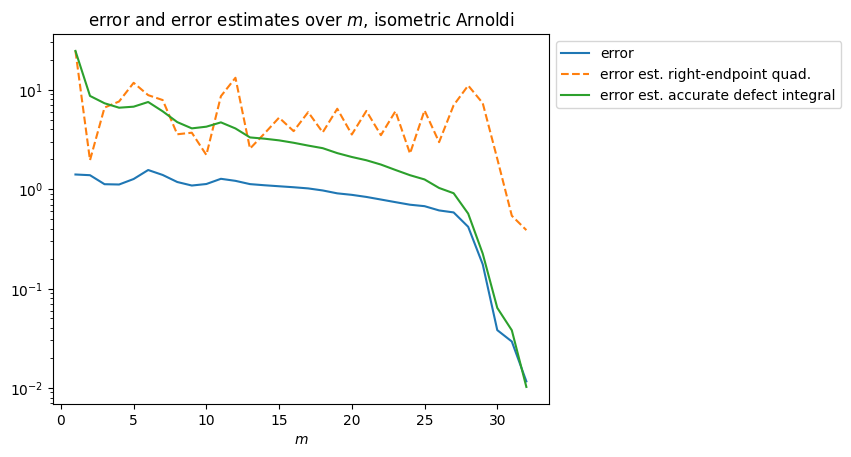

In [7]:
errests11 = np.array(errests11)
errests12 = np.array(errests12)

ms = np.arange(1,mmax+1)
plt.semilogy(ms,errs1)
plt.semilogy(ms,errests11,'--',ms,errests12)
plt.gca().legend(('error', 'error est. right-endpoint quad.', 'error est. accurate defect integral'),
                  bbox_to_anchor=(1.0, 1.0))
plt.xlabel('$m$')
plt.title('error and error estimates over $m$, isometric Arnoldi');


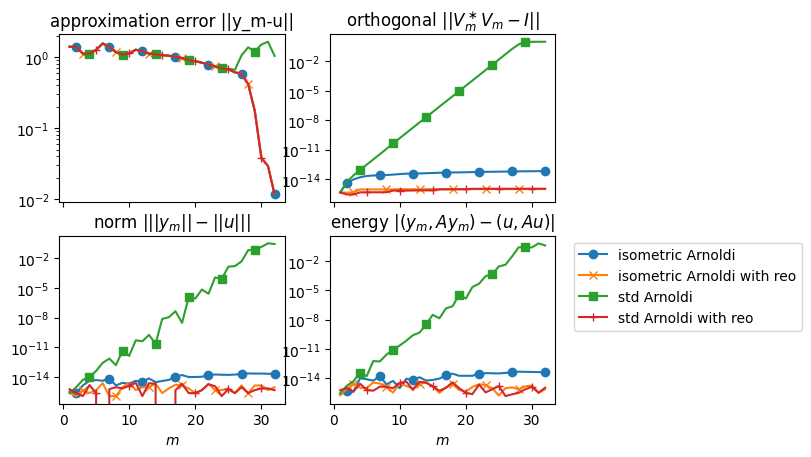

In [8]:

nrmu0 = nrm(u)
eu0 = inr(u,M.dot(u))

nrmlist1 = np.zeros(ms.size)
nrmlist2 = np.zeros(ms.size)
nrmlist3 = np.zeros(ms.size)
nrmlist4 = np.zeros(ms.size)
elist1 = np.zeros(ms.size)
elist2 = np.zeros(ms.size)
elist3 = np.zeros(ms.size)
elist4 = np.zeros(ms.size)
for j in range(mmax):
    y1 = YKry1[:,j]
    nrmlist1[j] = abs(nrm(y1)-nrmu0)
    elist1[j] = abs(inr(y1,M.dot(y1))-eu0)
    
    y1 = YKry2[:,j]
    nrmlist2[j] = abs(nrm(y1)-nrmu0)
    elist2[j] = abs(inr(y1,M.dot(y1))-eu0)
    
    y1 = YKry3[:,j]
    nrmlist3[j] = abs(nrm(y1)-nrmu0)
    elist3[j] = abs(inr(y1,M.dot(y1))-eu0)
    
    y1 = YKry4[:,j]
    nrmlist4[j] = abs(nrm(y1)-nrmu0)
    elist4[j] = abs(inr(y1,M.dot(y1))-eu0)

fig, axs = plt.subplots(2,2,sharex=True)
axs[1][0].set_xlabel('$m$')
axs[1][1].set_xlabel('$m$')

axs[0][0].set_title('approximation error ||y_m-u||');
axs[0][0].semilogy(ms,errs1,'-o',markevery=np.arange(1,mmax,5),color='tab:blue')
axs[0][0].semilogy(ms,errs2,'-x',markevery=np.arange(2,mmax,5),color='tab:orange')
axs[0][0].semilogy(ms,errs3,'-s',markevery=np.arange(3,mmax,5),color='tab:green')
axs[0][0].semilogy(ms,errs4,'-+',markevery=np.arange(4,mmax,5),color='tab:red')

axs[0][1].set_title('orthogonal $||V_m^\\ast V_m-I||$')
axs[0][1].semilogy(ms,ocheck1,'-o',markevery=np.arange(1,mmax,5),color='tab:blue')
axs[0][1].semilogy(ms,ocheck2,'-x',markevery=np.arange(2,mmax,5),color='tab:orange')
axs[0][1].semilogy(ms,ocheck3,'-s',markevery=np.arange(3,mmax,5),color='tab:green')
axs[0][1].semilogy(ms,ocheck4,'-+',markevery=np.arange(4,mmax,5),color='tab:red')

axs[1][0].set_title('norm $|||y_m||-||u|||$')
axs[1][0].semilogy(ms,nrmlist1,'-o',markevery=np.arange(1,mmax,5),color='tab:blue')
axs[1][0].semilogy(ms,nrmlist2,'-x',markevery=np.arange(2,mmax,5),color='tab:orange')
axs[1][0].semilogy(ms,nrmlist3,'-s',markevery=np.arange(3,mmax,5),color='tab:green')
axs[1][0].semilogy(ms,nrmlist4,'-+',markevery=np.arange(4,mmax,5),color='tab:red')

axs[1][1].set_title('energy $|(y_m,Ay_m)-(u,Au)|$')
axs[1][1].semilogy(ms,elist1,'-o',markevery=np.arange(1,mmax,5),color='tab:blue')
axs[1][1].semilogy(ms,elist2,'-x',markevery=np.arange(2,mmax,5),color='tab:orange')
axs[1][1].semilogy(ms,elist3,'-s',markevery=np.arange(3,mmax,5),color='tab:green')
axs[1][1].semilogy(ms,elist4,'-+',markevery=np.arange(4,mmax,5),color='tab:red')

plt.gca().legend(('isometric Arnoldi', 'isometric Arnoldi with reo', 'std Arnoldi', 'std Arnoldi with reo'),
                  bbox_to_anchor=(1.05, 1.0))

plt.savefig("exampleSAI.png",bbox_inches='tight')